#Deep Learning With Computer Vision And Advanced NLP (DL_CV_NLP)

$$ Revision Notes $$
$$ A-Note-by-**Bappy Ahmed** $$

# Implementation of ANN using Keras:

In [ ]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.5.0
Keras Version 2.5.0


In [ ]:
# Changing directory to my drive
ROOT = "/content/drive/MyDrive/DL-CV-NLP/Revision "
os.chdir(ROOT)

In [ ]:
os.getcwd()

'/content/drive/My Drive/DL-CV-NLP/Revision '

# GPU / CPU Check

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


#Creating a simple classifier using keras on MNIST data

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
len(X_test[1][0])

28

In [ ]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [ ]:
len(X_train_full[5000:] )

55000

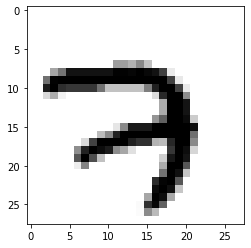

In [ ]:
# Lets view some data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

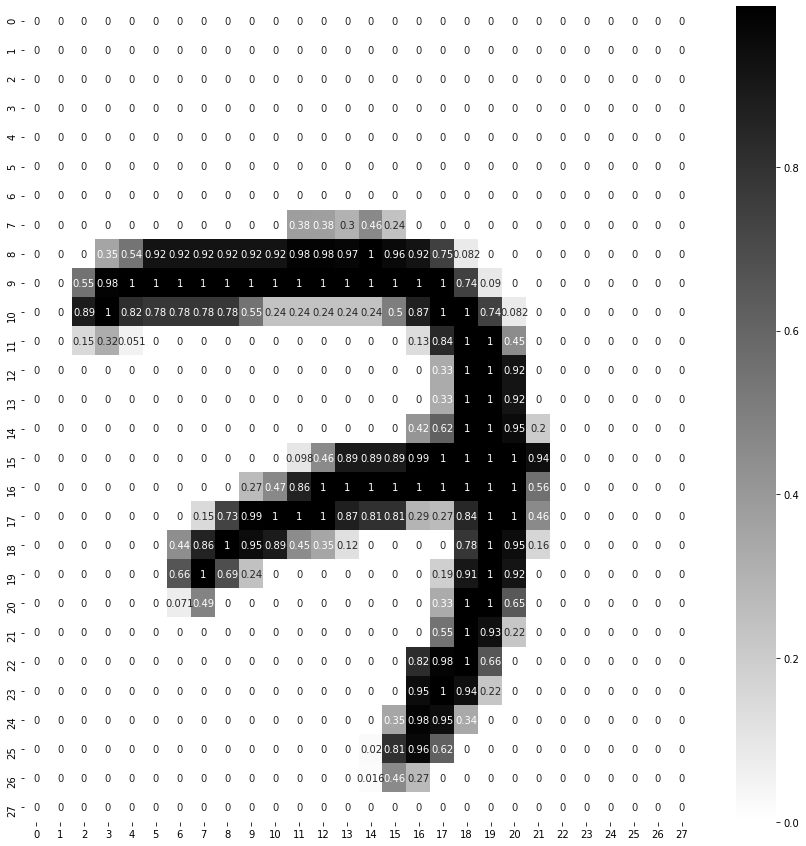

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

# Architechture Used:
<img src="https://github.com/entbappy/Branching-tutorial/blob/master/9.png?raw=true"
width="500" 
height="300">

In [ ]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [ ]:
# Total parameters to be trained 
sum((235500, 30100, 1010))

266610

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
len(hidden1.get_weights()[1])

300

In [ ]:
hidden1.get_weights()

[array([[-0.04071231,  0.02368394, -0.04371588, ...,  0.03490927,
          0.04804594, -0.04025941],
        [ 0.07241748,  0.04408754,  0.04216108, ...,  0.03603031,
          0.03906497, -0.07369931],
        [-0.05971236,  0.06530608, -0.03200042, ..., -0.00993332,
          0.06796919, -0.05723395],
        ...,
        [ 0.05587782,  0.03816801, -0.04787287, ...,  0.01242442,
          0.02829525, -0.04116471],
        [-0.03556294,  0.06861447,  0.0311735 , ...,  0.05164792,
         -0.00438299, -0.0568511 ],
        [-0.00249385, -0.05429724, -0.03027862, ...,  0.05772662,
          0.03096132, -0.02140954]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.04071231,  0.02368394, -0.04371588, ...,  0.03490927,
         0.04804594, -0.04025941],
       [ 0.07241748,  0.04408754,  0.04216108, ...,  0.03603031,
         0.03906497, -0.07369931],
       [-0.05971236,  0.06530608, -0.03200042, ..., -0.00993332,
         0.06796919, -0.05723395],
       ...,
       [ 0.05587782,  0.03816801, -0.04787287, ...,  0.01242442,
         0.02829525, -0.04116471],
       [-0.03556294,  0.06861447,  0.0311735 , ...,  0.05164792,
        -0.00438299, -0.0568511 ],
       [-0.00249385, -0.05429724, -0.03027862, ...,  0.05772662,
         0.03096132, -0.02140954]], dtype=float32)

In [ ]:
print("shape\n", biases.shape)

shape
 (300,)


In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [ ]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/30
1719/1719 [==============================] - 6s 2ms/step - loss: 0.6108 - accuracy: 0.8404 - val_loss: 0.3050 - val_accuracy: 0.9118
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2860 - accuracy: 0.9187 - val_loss: 0.2445 - val_accuracy: 0.9314
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2347 - accuracy: 0.9329 - val_loss: 0.2028 - val_accuracy: 0.9444
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2007 - accuracy: 0.9434 - val_loss: 0.1808 - val_accuracy: 0.9494
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1753 - accuracy: 0.9501 - val_loss: 0.1614 - val_accuracy: 0.9562
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1554 - accuracy: 0.9560 - val_loss: 0.1473 - val_accuracy: 0.9606
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1391 - accuracy: 0.9606 - val_loss: 0.1357 - val_accuracy:

In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.610783,0.840400,0.304987,0.9118
1,0.285988,0.918727,0.244523,0.9314
2,0.234710,0.932945,0.202774,0.9444
3,0.200725,0.943436,0.180845,0.9494
4,0.175329,0.950091,0.161418,0.9562
5,0.155363,0.955982,0.147345,0.9606
6,0.139052,0.960618,0.135747,0.9632
7,0.125705,0.964527,0.126051,0.9656
8,0.114648,0.967818,0.116540,0.9680
9,0.105304,0.970418,0.110109,0.9688


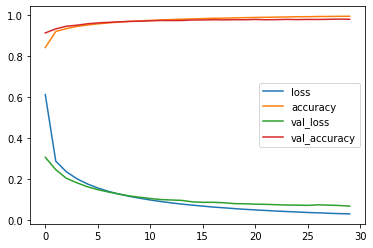

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0713 - accuracy: 0.9777


[0.07131989300251007, 0.9776999950408936]

In [ ]:
x_new = X_test[:3]
# x_new

In [ ]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [ ]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [ ]:
y_prob

array([[1.26814825e-06, 4.46078133e-07, 1.07542524e-04, 1.11021555e-03,
        8.08912104e-10, 6.93279389e-07, 2.99566656e-11, 9.98763442e-01,
        2.68553026e-06, 1.37673715e-05],
       [1.36328981e-05, 2.90468706e-05, 9.99673128e-01, 1.67828388e-04,
        4.09359916e-12, 2.81948644e-07, 2.40973009e-06, 2.80236584e-10,
        1.13638853e-04, 7.04005257e-11],
       [8.51472032e-06, 9.97284412e-01, 3.58027231e-04, 7.38601229e-05,
        4.06352337e-04, 9.29948001e-05, 1.49637301e-04, 9.27356305e-04,
        6.85796491e-04, 1.29904947e-05]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob, axis = -1)

In [ ]:
y_pred

array([7, 2, 1])

In [ ]:
actual

array([7, 2, 1], dtype=uint8)

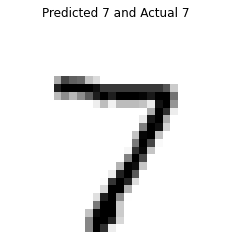

######################


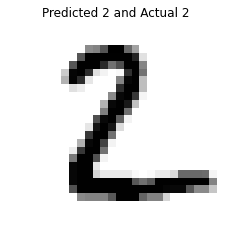

######################


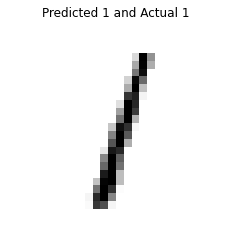

######################


In [ ]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show() 
  print("######################")